## PyTorch Basics

Author: Tobias Uelwer

### What is PyTorch?
- PyTorch is a Python Deep Learning library
- Allows us to easily train neural networks, i.e. calculate gradients und update weights
- Developed by Facebook's artificial-intelligence research group
- Works hand in hand with NumPy arrays

(See: https://pytorch.org/ and https://en.wikipedia.org/wiki/PyTorch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
print(torch.__version__)

1.12.1


In [2]:
# we create a new PyTorch tensor from a NumPy tensor
torch.from_numpy(np.ones((2,2)))
# we can instantanly access its values

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [3]:
# generate a random tensor
A = torch.randn(4,5)
A

tensor([[ 0.6228, -0.4748,  0.8062, -0.0866, -0.2973],
        [-1.4391,  0.0390, -0.4187,  0.1540,  0.0656],
        [-0.6182, -2.8717,  1.5573, -0.9319,  0.8497],
        [-0.8422,  0.0672,  0.0869,  0.2593, -1.8447]])

In [4]:
# transpose
A.T

tensor([[ 0.6228, -1.4391, -0.6182, -0.8422],
        [-0.4748,  0.0390, -2.8717,  0.0672],
        [ 0.8062, -0.4187,  1.5573,  0.0869],
        [-0.0866,  0.1540, -0.9319,  0.2593],
        [-0.2973,  0.0656,  0.8497, -1.8447]])

In [5]:
# indexing
A[0,0]

tensor(0.6228)

In [6]:
# more indexing
A[:,2]

tensor([ 0.8062, -0.4187,  1.5573,  0.0869])

In [7]:
# get the shape of A
A.shape

torch.Size([4, 5])

In [8]:
# traces and matrix transpose
torch.trace(torch.t(A) @ A)

tensor(20.4714)

In [9]:
# the function item() returns a simple Python scalar
torch.sum(A**2).item()

20.47139549255371

In [10]:
# reshaping
A.view(-1,2,10)

tensor([[[ 0.6228, -0.4748,  0.8062, -0.0866, -0.2973, -1.4391,  0.0390,
          -0.4187,  0.1540,  0.0656],
         [-0.6182, -2.8717,  1.5573, -0.9319,  0.8497, -0.8422,  0.0672,
           0.0869,  0.2593, -1.8447]]])

In [11]:
# flattens a tensor to a vector
Ones = torch.ones((2,1,9,1))
Ones.shape, Ones.squeeze().shape

(torch.Size([2, 1, 9, 1]), torch.Size([2, 9]))

In [12]:
# add dimensions
torch.ones(9).unsqueeze(0).shape, torch.ones(9).unsqueeze(1).shape

(torch.Size([1, 9]), torch.Size([9, 1]))

In [13]:
# add new dimensions (this also works with numpy arrays...)
A[None, :, None,:, None].shape

torch.Size([1, 4, 1, 5, 1])

In [14]:
# elementwise power
A**2

tensor([[3.8792e-01, 2.2543e-01, 6.4993e-01, 7.5072e-03, 8.8373e-02],
        [2.0710e+00, 1.5214e-03, 1.7532e-01, 2.3719e-02, 4.3063e-03],
        [3.8223e-01, 8.2469e+00, 2.4253e+00, 8.6849e-01, 7.2192e-01],
        [7.0932e-01, 4.5186e-03, 7.5483e-03, 6.7223e-02, 3.4029e+00]])

In [15]:
# logarithm and absolute value
torch.log(torch.abs(A)) #ln

tensor([[-0.4735, -0.7449, -0.2154, -2.4459, -1.2131],
        [ 0.3640, -3.2441, -0.8706, -1.8707, -2.7238],
        [-0.4809,  1.0549,  0.4430, -0.0705, -0.1629],
        [-0.1717, -2.6998, -2.4432, -1.3499,  0.6123]])

In [16]:
# all close
torch.allclose(torch.log(torch.exp(A)), A)

True

In [17]:
## never compare floats with "=="
torch.log(torch.exp(A)) == A

tensor([[ True, False,  True, False, False],
        [ True, False,  True, False, False],
        [ True,  True,  True, False, False],
        [ True, False, False, False,  True]])

In [18]:
torch.trace(A)

tensor(2.4785)

In [19]:
A@A.T

tensor([[ 1.3592, -1.2852,  2.0621,  0.0395],
        [-1.2852,  2.2759,  0.0379,  1.0972],
        [ 2.0621,  0.0379, 12.6449, -1.3460],
        [ 0.0395,  1.0972, -1.3460,  4.1915]])

### Automatic differentiation

In [20]:
# if we want to calculate gradients we need to specify this
# by setting requires_grad=True for each tensor
X = torch.ones(2, 2, requires_grad=True)
X

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [21]:
# we build a simple computational graph 
y = torch.sum(torch.exp(X))
y

tensor(10.8731, grad_fn=<SumBackward0>)

In [22]:
# In pytorch gradients are accumulated each time backward() is called.
# Keep that in mind!
y.backward()
X.grad

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])

In [23]:
# to suppress this behavior we have to reset the gradients by
X.grad.zero_()
y = torch.sum(torch.exp(X))
y.backward() 
X.grad

tensor([[2.7183, 2.7183],
        [2.7183, 2.7183]])

### Optimizing functions

In [24]:
# define variable
x = torch.tensor([2.,2.], requires_grad=True)

We want to minimize the function $f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2$.

The function has a minimum at $(1,1)$.

In [25]:
# define objective
def f(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

In [26]:
# instantiate optimizer
opt = torch.optim.Adam([x], lr=10)

In [27]:
i = 0
while True:
    opt.zero_grad()
    f_val = f(x)
    f_val.backward()
    opt.step()
    i += 1
    if torch.norm(x.grad)<0.001:
        print("Converged after {} iterations.".format(i))
        print("Minimum: {}".format(str(x.detach().numpy())))
        break
    if i>100000:
        print("Maximum number of iterations reached.")
        break

Converged after 2538 iterations.
Minimum: [0.9992902 0.9985799]


## Implementing a linear regression model

In [28]:
# generate some data
x = torch.rand(100,1)
y = x*2 + torch.randn(100,1)*0.04

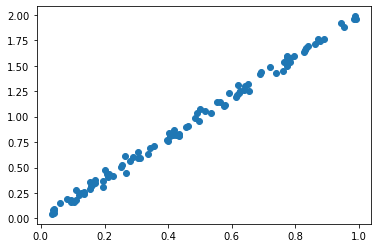

In [29]:
plt.scatter(x,y)

In [30]:
from torch import nn
from torch import optim

In [31]:
linear_model = nn.Linear(in_features=1, out_features=1) # define model

criterion = nn.MSELoss() # instantiate loss 

optimizer = optim.Adam(linear_model.parameters(), lr=0.1) # instantiate optimizer

In [32]:
for k in range(0, 500):
    # set the parameter gradients to zero
    optimizer.zero_grad()

    # forward pass
    outputs = linear_model(x)
        
    # training loss
    loss = criterion(outputs, y)
    
    if k % 50 == 0:
        print(loss.item())
        
    # backward pass
    loss.backward()
    optimizer.step()

0.18063770234584808
0.0014866887358948588
0.0012291534803807735
0.0012278154026716948
0.0012278086505830288
0.0012278087669983506
0.0012278086505830288
0.0012278088834136724
0.0012278087669983506
0.0012278087669983506


In [33]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[2.0003]], requires_grad=True),
 Parameter containing:
 tensor([-0.0020], requires_grad=True)]

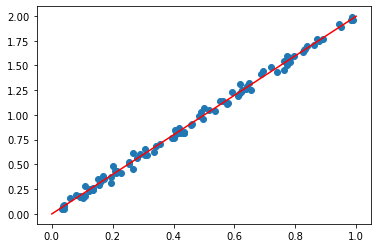

In [34]:
x_plot = torch.linspace(0, 1, 200)[:,None]
plt.scatter(x,y)
plt.plot(x_plot.numpy(), linear_model(x_plot).detach().numpy(), 'r');

## Fitting a neural network regression model

In [58]:
# generate some more complicated data
x = 20*torch.rand(100,1)
y = torch.sin(x) + torch.randn(100,1)*0.04

In [60]:
# define model
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=100),
    nn.Tanh(),
    nn.Linear(in_features=100, out_features=100),
    nn.Tanh(),
    nn.Linear(in_features=100, out_features=100),
    nn.Tanh(),
    nn.Linear(in_features=100, out_features=100),
    nn.Tanh(),
    nn.Linear(in_features=100, out_features=1)
);

criterion = nn.MSELoss(); # instantiate loss 

optimizer = optim.Adam(model.parameters()); # instantiate optimizer

In [61]:
for k in range(0, 10000):
    # set the parameter gradients to zero
    optimizer.zero_grad();

    # forward pass
    outputs = model(x)
        
    # training loss
    loss = criterion(outputs, y)
    
    if k % 500 == 0:
        print(loss.item())
        
    # backward pass
    loss.backward()
    optimizer.step()

0.4949086904525757
0.36875802278518677
0.25697028636932373
0.0014607246266677976
0.0013890234986320138
0.0013622826663777232
0.0029035937041044235
0.0013240480329841375
0.0013098337221890688
0.0013049665139988065
0.0012920243898406625
0.0012867600889876485
0.0012792091583833098
0.0012789970496669412
0.0012639266205951571
0.0012547652004286647
0.0015823912108317018
0.0012711320305243134
0.0012270364677533507
0.001322657917626202


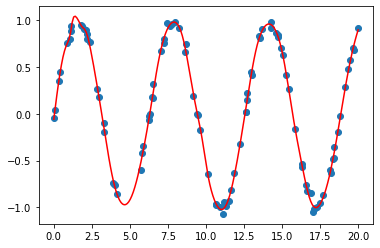

In [62]:
x_plot = torch.linspace(0,20, 200)[:,None]
plt.scatter(x,y)
plt.plot(x_plot.numpy(), model(x_plot).detach().numpy(), 'r');

In [56]:
x_plot.shape,  model(x_plot).shape

(torch.Size([200, 1]), torch.Size([200, 1]))

## Train a linear classifier

In [39]:
X1 = torch.randn((100,2)) + torch.tensor([1,2])
X2 = torch.randn((100,2)) + torch.tensor([3,5])
X = torch.cat((X1, X2))
y = torch.cat((torch.ones(100), torch.zeros(100)))

print(X.shape)
print(y.shape)

torch.Size([200, 2])
torch.Size([200])


tensor([1.8307, 3.4632])


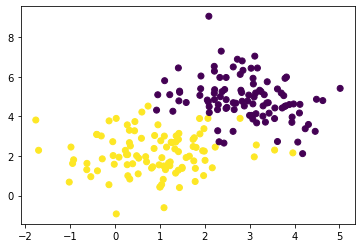

In [40]:
dataset = torch.utils.data.TensorDataset(X, y)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [150, 50])
X_train, y_train = train_dataset[:]
X_test, y_test = test_dataset[:]

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
print(X_train.mean(dim=0))

In [41]:
# multiple layers can be concatenated using nn.Sequential 
linear_classifier = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
optimizer = optim.Adam(linear_classifier.parameters(), 1e-1)
ce_loss = nn.BCELoss()

In [42]:
def compute_accuracy(y_true, output):
    y_pred = output > 0.5
    accuracy = torch.mean((y_pred == y_true).float())
    return accuracy.item()

accuracy: 0.5266666412353516
accuracy: 0.8999999761581421
accuracy: 0.8933333158493042
accuracy: 0.9399999976158142
accuracy: 0.9466666579246521
accuracy: 0.95333331823349
accuracy: 0.95333331823349
accuracy: 0.95333331823349
accuracy: 0.95333331823349
accuracy: 0.9599999785423279


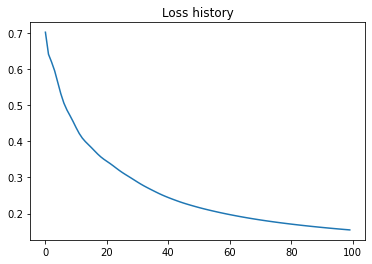

In [43]:
hist = []
for i in range(100):
    optimizer.zero_grad()            # set gradients to zero, otherwise they add up
    output = linear_classifier(X_train)[:,0] # compute output scores
    loss = ce_loss(output, y_train)  # compute training loss
    loss.backward()                  # compute gradients of the loss
    optimizer.step()                 # backpropagate gradients
    
    hist.append(loss.item())
    if i % 10 == 0:
        print('accuracy:', compute_accuracy(y_train, output))

plt.title('Loss history')
plt.plot(hist);

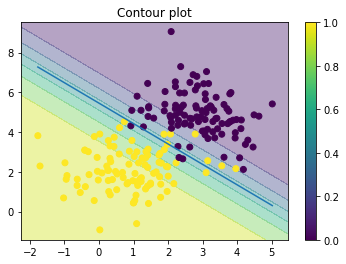

In [44]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.arange(x1_min-0.5, x1_max+0.5, 0.05), 
                       np.arange(x2_min-0.5, x2_max+0.5, 0.05))

X_grid = torch.as_tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float)
y_grid = linear_classifier(X_grid)[:, 0].detach().reshape(xx1.shape)

x_plot = np.linspace(x1_min, x1_max)
w, b = linear_classifier.parameters()
w, b = w.detach().flatten(), b.detach()
y_plot = -w[0] / w[1] * x_plot - b / w[1]
plt.plot(x_plot, y_plot)

plt.title('Contour plot')
plt.contourf(xx1, xx2, y_grid, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar();

In [45]:
output = linear_classifier(X_test)[:, 0]
print('test accuracy:', compute_accuracy(y_test, output))

test accuracy: 0.9399999976158142
